#LIBRARY NEED IT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium
from folium import plugins
from folium import Map
from folium.plugins import HeatMap
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

#Read datataset from drive



In [20]:
dataset = pd.read_csv('/content/drive/MyDrive/DTS-MACHINE-LEARNING-2022/GGU4-PROJECT/Pickups dataset/mex_clean.csv')

show 5 first data

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


Checking the index number and its data type.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694 entries, 0 to 12693
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12694 non-null  int64  
 1   vendor_id           12694 non-null  object 
 2   pickup_datetime     12694 non-null  object 
 3   dropoff_datetime    12694 non-null  object 
 4   pickup_longitude    12694 non-null  float64
 5   pickup_latitude     12694 non-null  float64
 6   dropoff_longitude   12694 non-null  float64
 7   dropoff_latitude    12694 non-null  float64
 8   store_and_fwd_flag  12694 non-null  object 
 9   trip_duration       12694 non-null  int64  
 10  dist_meters         12694 non-null  int64  
 11  wait_sec            12694 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.2+ MB


show descriptive statistics

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
dataset.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,12694.000,12694.000,12694.000,12694.000,12694.000,12694.000,12694.000,12694.000
mean,6347.500,-99.136,19.385,-99.134,19.387,22983.771,6666.432,1161269.622
std,3664.586,0.430,0.130,0.430,0.131,229336.369,11386.892,57996115.602
min,1.000,-108.985,18.829,-108.987,18.829,2.000,21.000,0.000
25%,3174.250,-99.196,19.326,-99.192,19.325,484.000,1775.000,89.000
50%,6347.500,-99.164,19.371,-99.161,19.375,1033.500,3948.000,234.000
75%,9520.750,-99.107,19.432,-99.107,19.434,2368.750,8265.000,591.000
max,12694.000,-86.871,25.753,-86.871,25.781,16570949.000,802537.000,4429346278.000


checking null value with isnull()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah missing value')

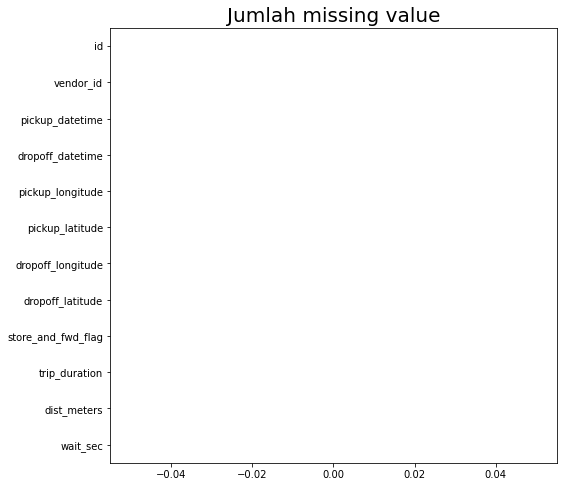

In [ ]:
y = dataset.isnull().sum().sort_values(ascending=False)[:12].index
x = dataset.isnull().sum().sort_values(ascending=False)[:12]
plt.figure(figsize=(8,8))
sns.barplot(x,y)
plt.title("Jumlah missing value",size=20)

checking NaN value with isna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah missing value')

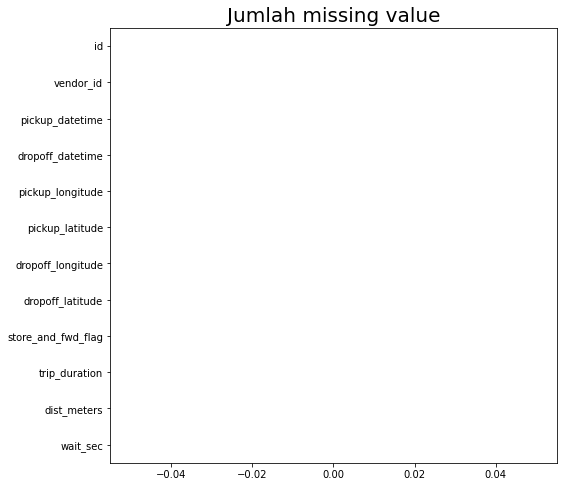

In [ ]:
y = dataset.isna().sum().sort_values(ascending=False)[:12].index
x = dataset.isna().sum().sort_values(ascending=False)[:12]
plt.figure(figsize=(8,8))
sns.barplot(x,y)
plt.title("Jumlah missing value",size=20)

Here we want to see, the longitude and latitude in pickup() and dropoff() columns based on the map.
We just showing 500 data in each column  

In [ ]:
pickup_ = dataset.loc[:500,['pickup_longitude', 'pickup_latitude']]
dropoff_ = dataset.loc[:500,['dropoff_longitude', 'dropoff_latitude']]

Pickup longitude and latitude

In [ ]:
Long = pickup_.pickup_longitude.mean()
Lat = pickup_.pickup_latitude.mean()
data_map = folium.Map([Lat, Long], zoom_start=12)

data_pickup_map = plugins.MarkerCluster().add_to(data_map)
for lat,lon,label in zip(pickup_.pickup_latitude, pickup_.pickup_longitude, dataset.vendor_id):
    folium.Marker(location=[lat, lon], icon=None,popup=label).add_to(data_pickup_map)
data_map.add_child(data_pickup_map)

data_map

Dropoff longitude and latitude

In [ ]:
Long = dropoff_.dropoff_longitude.mean()
Lat = dropoff_.dropoff_latitude.mean()
data_map = folium.Map([Lat, Long], zoom_start=12)

data_dropoff_map = plugins.MarkerCluster().add_to(data_map)
for lat,lon,label in zip(dropoff_.dropoff_latitude, dropoff_.dropoff_longitude, dataset.vendor_id):
    folium.Marker(location=[lat, lon], icon=None,popup=label).add_to(data_dropoff_map)
data_map.add_child(data_dropoff_map)

data_map

create a function for converting trip duration to time format

In [21]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

how it looks like in the print. We grouped time duration into 3 categories. There is lowest, average and highest.

and we found the lowest time duration which is two seconds, the average is 6 hours, and the highest is 19 hours

In [ ]:
trip_duration_min =  dataset['trip_duration'].min()
print('Waktu terkecil perjalanan  :', convert(trip_duration_min))

trip_duration_mean =  dataset['trip_duration'].mean()
print('Rata-rata waktu perjalanan :', convert(trip_duration_mean))

trip_duration_max =  dataset['trip_duration'].max()
print('Waktu terbanyak perjalanan :', convert(trip_duration_max))

Waktu terkecil perjalanan  : 0:00:02
Rata-rata waktu perjalanan : 6:23:03
Waktu terbanyak perjalanan : 19:02:29


we move to another column, we want to check how many `N`or `Y` values in `store_and_fwd_flag`

and as we all know, no one from column `store_and_fwd_flag` which is contain `Y` value

In [ ]:
dataset['store_and_fwd_flag'].value_counts()

N    12694
Name: store_and_fwd_flag, dtype: int64

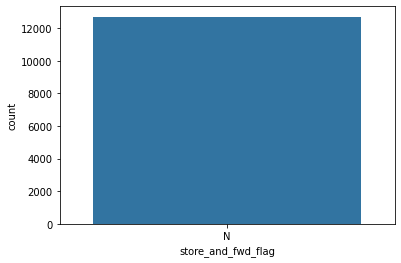

In [ ]:
sns.countplot(x='store_and_fwd_flag', data=dataset)

Checking distribution time duration with displot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


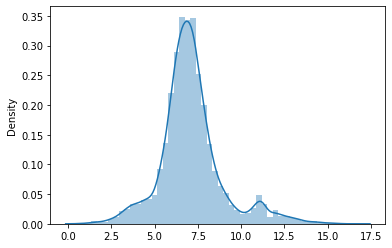

In [ ]:
sns.distplot(np.log(dataset['trip_duration'].values))
dataset['trip_duration']=np.log(dataset['trip_duration'])

Now we want to remove outliers data using the IQR method in `trip_duration` column. IQR is a way of understanding the spread of a set of numbers. The root quartile range is defined as the difference between the data set's upper quartile (25% top) the data set's and the lower quartile (25% lowest) the data set's 

In [22]:
Q1 = dataset['trip_duration'].quantile(0.25)
Q2 = dataset['trip_duration'].quantile(0.75)

In [23]:
IQR = Q2 - Q1

In [24]:
upper_limit = Q2 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [ ]:
dataset[dataset['trip_duration'] > upper_limit]
dataset[dataset['trip_duration'] < lower_limit]

In [26]:
train_df = dataset[dataset['trip_duration'] < upper_limit]
train_df.shape

(10932, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


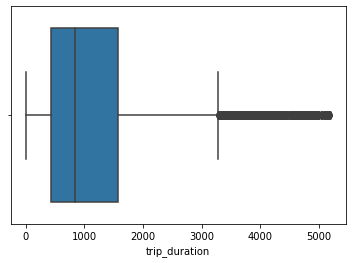

In [9]:
sns.boxplot(train_df['trip_duration'])

In [10]:
train_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
12687,12688,México DF Taxi Libre,2016-10-27 08:11:10,2016-10-27 08:15:21,-99.202,19.376,-99.194,19.388,N,252,2280,33
12689,12690,México DF Radio Taxi,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.181,19.369,-99.180,19.370,N,3846,8261,427
12690,12691,México DF Taxi de Sitio,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.060,19.307,-99.066,19.306,N,518,2498,115
12691,12692,México DF Taxi Libre,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.171,19.284,-99.178,19.281,N,1131,6051,228
12692,12693,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194,19.397,-99.195,19.397,N,104,49,96


Based on the minimum duration, in our perspective, it's impossible there is a trip that is just 2 seconds. So, we want to make standardization by determining the lowest trip value which is 300 seconds or same as 5 minutes.

In [27]:
df_train = train_df[train_df['trip_duration'] >= 300]

In [12]:
df_train.shape

(9054, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


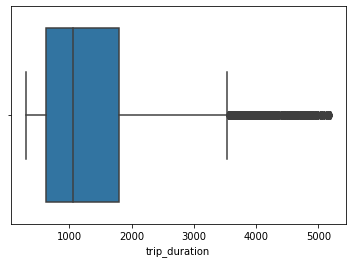

In [ ]:
sns.boxplot(df_train['trip_duration'])

In [ ]:
trip_duration_max_train_df =  df_train['trip_duration'].min()
print('Waktu terpendek perjalanan  :', convert(trip_duration_max_train_df))

Waktu terpendek perjalanan  : 0:05:00


Text(0, 0.5, 'number of train records')

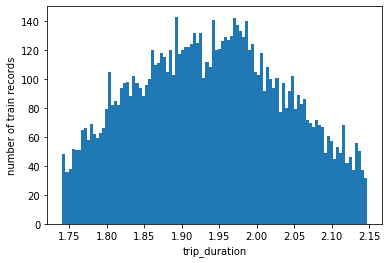

In [ ]:
plt.hist(df_train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')

Now, the `trip duration` histogram is look better

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


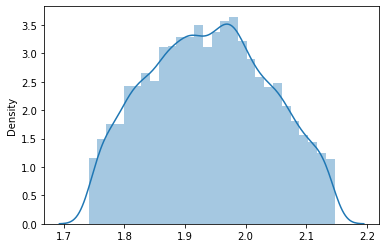

In [ ]:
sns.distplot(np.log(df_train['trip_duration'].values))
df_train['trip_duration']=np.log(df_train['trip_duration'])

Also, we want to process the data by DateTime in `pickup_datetime` and converting column to DateTime format

In [28]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 2 to 12691
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  9054 non-null   int64         
 1   vendor_id           9054 non-null   object        
 2   pickup_datetime     9054 non-null   datetime64[ns]
 3   dropoff_datetime    9054 non-null   object        
 4   pickup_longitude    9054 non-null   float64       
 5   pickup_latitude     9054 non-null   float64       
 6   dropoff_longitude   9054 non-null   float64       
 7   dropoff_latitude    9054 non-null   float64       
 8   store_and_fwd_flag  9054 non-null   object        
 9   trip_duration       9054 non-null   float64       
 10  dist_meters         9054 non-null   int64         
 11  wait_sec            9054 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 919.5+ KB


extracting day of week from pickup_datetime column 

In [ ]:
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()

In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.290,19.326,-99.272,19.329,N,1.875,2848,129,Sunday
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271,19.329,-99.280,19.326,N,1.805,1409,106,Sunday
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.283,19.327,-99.292,19.323,N,1.807,1567,85,Sunday
6,7,México DF Taxi Libre,2016-09-18 11:00:00,2016-09-18 11:05:45,-99.285,19.326,-99.283,19.328,N,1.765,676,169,Sunday
7,8,México DF Taxi Libre,2016-09-18 11:08:03,2016-09-18 11:17:06,-99.286,19.330,-99.290,19.319,N,1.840,3771,37,Sunday


extracting hour of the week from pickup_datetime column 

In [ ]:
df_train['hour_of_the_day'] = df_train['pickup_datetime'].dt.hour

In [ ]:
df_train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day
12685,12686,México DF Taxi de Sitio,2016-10-27 04:52:10,2016-10-27 05:06:37,-99.180,19.439,-99.157,19.457,N,1.912,4908,150,Thursday,4
12686,12687,México DF Taxi Libre,2016-10-27 05:02:26,2016-10-27 05:23:32,-99.060,19.308,-99.010,19.288,N,1.966,7407,386,Thursday,5
12689,12690,México DF Radio Taxi,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.181,19.369,-99.180,19.370,N,2.111,8261,427,Thursday,9
12690,12691,México DF Taxi de Sitio,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.060,19.307,-99.066,19.306,N,1.833,2498,115,Thursday,10
12691,12692,México DF Taxi Libre,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.171,19.284,-99.178,19.281,N,1.950,6051,228,Thursday,11


extracting months from pickup_datetime column



In [ ]:
df_train['month'] = df_train['pickup_datetime'].dt.month

In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.290,19.326,-99.272,19.329,N,1.875,2848,129,Sunday,10,9
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271,19.329,-99.280,19.326,N,1.805,1409,106,Sunday,10,9
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.283,19.327,-99.292,19.323,N,1.807,1567,85,Sunday,10,9
6,7,México DF Taxi Libre,2016-09-18 11:00:00,2016-09-18 11:05:45,-99.285,19.326,-99.283,19.328,N,1.765,676,169,Sunday,11,9
7,8,México DF Taxi Libre,2016-09-18 11:08:03,2016-09-18 11:17:06,-99.286,19.330,-99.290,19.319,N,1.840,3771,37,Sunday,11,9


extracting session times from pickup_datetime column


In [ ]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']
df_train['sessions'] = pd.cut(df_train['hour_of_the_day'], bins=b, labels=l, include_lowest=True)

In [33]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month,sessions
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.290,19.326,-99.272,19.329,N,681,2848,129,Sunday,10,9,Morning
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271,19.329,-99.280,19.326,N,436,1409,106,Sunday,10,9,Morning
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.283,19.327,-99.292,19.323,N,442,1567,85,Sunday,10,9,Morning
6,7,México DF Taxi Libre,2016-09-18 11:00:00,2016-09-18 11:05:45,-99.285,19.326,-99.283,19.328,N,345,676,169,Sunday,11,9,Morning
7,8,México DF Taxi Libre,2016-09-18 11:08:03,2016-09-18 11:17:06,-99.286,19.330,-99.290,19.319,N,544,3771,37,Sunday,11,9,Morning


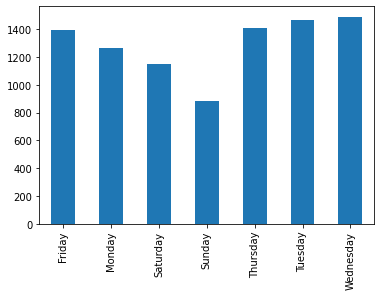

In [34]:
df_train['day_of_week'].value_counts().sort_index(ascending=True).plot(kind='bar')

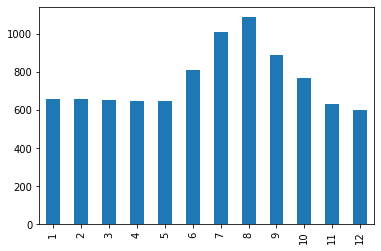

In [35]:
df_train['hour_of_the_day'].value_counts().sort_index(ascending=True).plot(kind='bar')

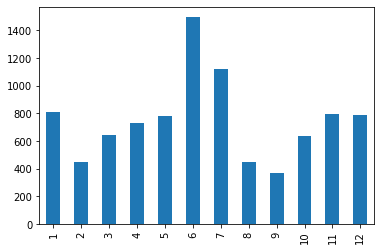

In [38]:
df_train['month'].value_counts().sort_index(ascending=True).plot(kind='bar')

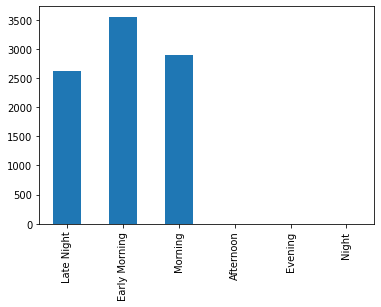

In [36]:
df_train['sessions'].value_counts().sort_index(ascending=True).plot(kind='bar')

Create a function to get the distance from longitude and latitude

In [39]:
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

applying the function that recently created

In [ ]:
df_train['distance'] = df_train.apply(lambda row:haversine(row['pickup_latitude'], 
                                                        row['pickup_longitude'], 
                                                        row['dropoff_latitude'],
                                                        row['dropoff_longitude']), axis=1)
df_train['distance'] = df_train['distance'].astype(float)

Now we have new column that is distance

In [41]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month,sessions,distance
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.290,19.326,-99.272,19.329,N,681,2848,129,Sunday,10,9,Morning,1.877
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271,19.329,-99.280,19.326,N,436,1409,106,Sunday,10,9,Morning,0.962
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.283,19.327,-99.292,19.323,N,442,1567,85,Sunday,10,9,Morning,1.048
6,7,México DF Taxi Libre,2016-09-18 11:00:00,2016-09-18 11:05:45,-99.285,19.326,-99.283,19.328,N,345,676,169,Sunday,11,9,Morning,0.364
7,8,México DF Taxi Libre,2016-09-18 11:08:03,2016-09-18 11:17:06,-99.286,19.330,-99.290,19.319,N,544,3771,37,Sunday,11,9,Morning,1.275


Drop longitude and latitude, before training to model

In [ ]:
df_train.drop('pickup_longitude',inplace=True,axis=1)
df_train.drop('pickup_latitude',inplace=True,axis=1)
df_train.drop('dropoff_longitude',inplace=True,axis=1)
df_train.drop('dropoff_latitude',inplace=True,axis=1)
df_train.drop('pickup_datetime',inplace=True,axis=1)

In [ ]:
df_train

,id,vendor_id,dropoff_datetime,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month,FIRST_DATES,FIRST_TIME,LAST_DATES,LAST_TIME,FIRSTLAST_HOUR,FIRSTLAST_SESSION,distance
2,3,México DF Taxi Libre,2016-09-18 10:23:11,N,0.629,2848,129,Sunday,10,9,2016-09-18,10:11:50,2016-09-18,10:11:50,10,Morning,1.877
3,4,México DF Taxi Libre,2016-09-18 10:30:53,N,0.590,1409,106,Sunday,10,9,2016-09-18,10:23:38,2016-09-18,10:23:38,10,Morning,0.962
4,5,México DF Taxi Libre,2016-09-18 10:51:40,N,0.592,1567,85,Sunday,10,9,2016-09-18,10:44:18,2016-09-18,10:44:18,10,Morning,1.048
6,7,México DF Taxi Libre,2016-09-18 11:05:45,N,0.568,676,169,Sunday,11,9,2016-09-18,11:00:00,2016-09-18,11:00:00,11,Morning,0.364
7,8,México DF Taxi Libre,2016-09-18 11:17:06,N,0.610,3771,37,Sunday,11,9,2016-09-18,11:08:03,2016-09-18,11:08:03,11,Morning,1.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,12686,México DF Taxi de Sitio,2016-10-27 05:06:37,N,0.648,4908,150,Thursday,4,10,2016-10-27,04:52:10,2016-10-27,04:52:10,4,Late Night,3.092
12686,12687,México DF Taxi Libre,2016-10-27 05:23:32,N,0.676,7407,386,Thursday,5,10,2016-10-27,05:02:26,2016-10-27,05:02:26,5,Early Morning,5.736
12689,12690,México DF Radio Taxi,2016-10-27 10:14:10,N,0.747,8261,427,Thursday,9,10,2016-10-27,09:10:05,2016-10-27,09:10:05,9,Morning,0.142
12690,12691,México DF Taxi de Sitio,2016-10-27 11:01:53,N,0.606,2498,115,Thursday,10,10,2016-10-27,10:53:15,2016-10-27,10:53:15,10,Morning,0.658


We want to check there is how many vendors in the data

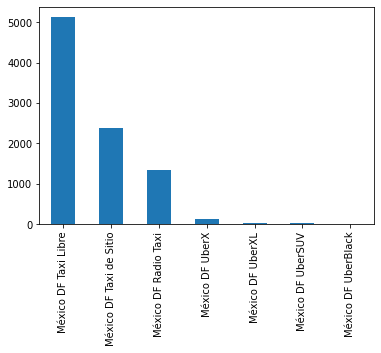

In [ ]:
df_train['vendor_id'].value_counts().plot.bar()

In [ ]:
df_train['vendor_id'].unique()

array(['México DF Taxi Libre', 'México DF Radio Taxi',
       'México DF Taxi de Sitio', 'México DF UberX',
       'México DF UberBlack', 'México DF UberXL', 'México DF UberSUV'],
      dtype=object)

Replace the vendor id by number

In [ ]:
vendor_id = [df_train]
for df_train in vendor_id:    
    df_train.loc[df_train['vendor_id'] == 'México DF Taxi de Sitio', 'vendor_id'] = 1
    df_train.loc[df_train['vendor_id'] == 'México DF Taxi Libre', 'vendor_id'] = 2
    df_train.loc[df_train['vendor_id'] == 'México DF Radio Taxi', 'vendor_id'] = 3
    df_train.loc[df_train['vendor_id'] == 'México DF UberX', 'vendor_id'] = 4
    df_train.loc[df_train['vendor_id'] == 'México DF UberXL', 'vendor_id'] = 5
    df_train.loc[df_train['vendor_id'] == 'México DF UberSUV', 'vendor_id'] = 6
    df_train.loc[df_train['vendor_id'] == 'México DF UberBlack', 'vendor_id'] = 7
df_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,vendor_id,dropoff_datetime,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month,FIRST_DATES,FIRST_TIME,LAST_DATES,LAST_TIME,FIRSTLAST_HOUR,FIRSTLAST_SESSION,distance
2,3,2,2016-09-18 10:23:11,N,0.629,2848,129,Sunday,10,9,2016-09-18,10:11:50,2016-09-18,10:11:50,10,Morning,1.877
3,4,2,2016-09-18 10:30:53,N,0.590,1409,106,Sunday,10,9,2016-09-18,10:23:38,2016-09-18,10:23:38,10,Morning,0.962
4,5,2,2016-09-18 10:51:40,N,0.592,1567,85,Sunday,10,9,2016-09-18,10:44:18,2016-09-18,10:44:18,10,Morning,1.048
6,7,2,2016-09-18 11:05:45,N,0.568,676,169,Sunday,11,9,2016-09-18,11:00:00,2016-09-18,11:00:00,11,Morning,0.364
7,8,2,2016-09-18 11:17:06,N,0.610,3771,37,Sunday,11,9,2016-09-18,11:08:03,2016-09-18,11:08:03,11,Morning,1.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,12686,1,2016-10-27 05:06:37,N,0.648,4908,150,Thursday,4,10,2016-10-27,04:52:10,2016-10-27,04:52:10,4,Late Night,3.092
12686,12687,2,2016-10-27 05:23:32,N,0.676,7407,386,Thursday,5,10,2016-10-27,05:02:26,2016-10-27,05:02:26,5,Early Morning,5.736
12689,12690,3,2016-10-27 10:14:10,N,0.747,8261,427,Thursday,9,10,2016-10-27,09:10:05,2016-10-27,09:10:05,9,Morning,0.142
12690,12691,1,2016-10-27 11:01:53,N,0.606,2498,115,Thursday,10,10,2016-10-27,10:53:15,2016-10-27,10:53:15,10,Morning,0.658


In [ ]:
df_train['vendor_id'].unique()

array([2, 3, 1, 4, 7, 5, 6], dtype=object)

Also, replace day of the week by number

In [ ]:
df_train['day_of_week'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [ ]:
day_of_week = [df_train]
for df_train in day_of_week:    
    df_train.loc[df_train['day_of_week'] == 'Sunday', 'day_of_week'] = 1
    df_train.loc[df_train['day_of_week'] == 'Monday', 'day_of_week'] = 2
    df_train.loc[df_train['day_of_week'] == 'Tuesday', 'day_of_week'] = 3
    df_train.loc[df_train['day_of_week'] == 'Wednesday', 'day_of_week'] = 4
    df_train.loc[df_train['day_of_week'] == 'Thursday', 'day_of_week'] = 5
    df_train.loc[df_train['day_of_week'] == 'Friday', 'day_of_week'] = 6
    df_train.loc[df_train['day_of_week'] == 'Saturday', 'day_of_week'] = 7
df_train

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,vendor_id,dropoff_datetime,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,day_of_week,hour_of_the_day,month,FIRST_DATES,FIRST_TIME,LAST_DATES,LAST_TIME,FIRSTLAST_HOUR,FIRSTLAST_SESSION,distance
2,3,2,2016-09-18 10:23:11,N,0.629,2848,129,1,10,9,2016-09-18,10:11:50,2016-09-18,10:11:50,10,Morning,1.877
3,4,2,2016-09-18 10:30:53,N,0.590,1409,106,1,10,9,2016-09-18,10:23:38,2016-09-18,10:23:38,10,Morning,0.962
4,5,2,2016-09-18 10:51:40,N,0.592,1567,85,1,10,9,2016-09-18,10:44:18,2016-09-18,10:44:18,10,Morning,1.048
6,7,2,2016-09-18 11:05:45,N,0.568,676,169,1,11,9,2016-09-18,11:00:00,2016-09-18,11:00:00,11,Morning,0.364
7,8,2,2016-09-18 11:17:06,N,0.610,3771,37,1,11,9,2016-09-18,11:08:03,2016-09-18,11:08:03,11,Morning,1.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,12686,1,2016-10-27 05:06:37,N,0.648,4908,150,5,4,10,2016-10-27,04:52:10,2016-10-27,04:52:10,4,Late Night,3.092
12686,12687,2,2016-10-27 05:23:32,N,0.676,7407,386,5,5,10,2016-10-27,05:02:26,2016-10-27,05:02:26,5,Early Morning,5.736
12689,12690,3,2016-10-27 10:14:10,N,0.747,8261,427,5,9,10,2016-10-27,09:10:05,2016-10-27,09:10:05,9,Morning,0.142
12690,12691,1,2016-10-27 11:01:53,N,0.606,2498,115,5,10,10,2016-10-27,10:53:15,2016-10-27,10:53:15,10,Morning,0.658


In [ ]:
df_train['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=object)

Replace dtypes `vendor_id` and `day_of_week` as `float`

In [ ]:
df_train['vendor_id'] = df_train['vendor_id'].astype(float)
df_train['day_of_week'] = df_train['day_of_week'].astype(float)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 2 to 12691
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  9054 non-null   int64   
 1   vendor_id           9054 non-null   float64 
 2   dropoff_datetime    9054 non-null   object  
 3   store_and_fwd_flag  9054 non-null   object  
 4   trip_duration       9054 non-null   float64 
 5   dist_meters         9054 non-null   int64   
 6   wait_sec            9054 non-null   int64   
 7   day_of_week         9054 non-null   float64 
 8   hour_of_the_day     9054 non-null   int64   
 9   month               9054 non-null   int64   
 10  FIRST_DATES         9054 non-null   object  
 11  FIRST_TIME          9054 non-null   object  
 12  LAST_DATES          9054 non-null   object  
 13  LAST_TIME           9054 non-null   object  
 14  FIRSTLAST_HOUR      9054 non-null   int64   
 15  FIRSTLAST_SESSION   9054 non-null   c

Initialize data for X (train)

we just 
take 'vendor_id','day_of_week','hour_of_the_day','month','distance as X data

In [ ]:
X = df_train[['vendor_id','day_of_week','hour_of_the_day','month','distance']].values

Initialize for Y (target) data

Just take trip_duration as Y data

In [ ]:
Y = df_train[['trip_duration']].values
Y

array([[0.62883295],
       [0.59034829],
       [0.59159227],
       ...,
       [0.74706395],
       [0.60572345],
       [0.66798765]])

Splitting data 

90% to training and 10% to testing 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print('X_train:', x_train.shape,'\n', 'Y_train:', y_train.shape, '\n' 
      'X_test:', x_test.shape,'\n', 'y_test:', y_test.shape, '\n')

X_train: (8148, 5) 
 Y_train: (8148, 1) 
X_test: (906, 5) 
 y_test: (906, 1) 



Create sequntial neural network model with `Tensorflow` https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 

Here for calculating loss using `MSE` https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError

optimizer using `sgd` https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

 and metrics using `MAE` https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError

In [ ]:
tf.random.set_seed(42)

model_n = Sequential([
    Dense(64, input_dim=(x_train.shape[1])),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1)
])

model_n.compile(
    loss='mse',
    optimizer='sgd',
    metrics=['mae']
)

history_model = model_n.fit(x_train, y_train, epochs=300)

Epoch 1/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0524 - mae: 0.1142
Epoch 2/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0063 - mae: 0.0627
Epoch 3/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0044 - mae: 0.0522
Epoch 4/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0035 - mae: 0.0463
Epoch 5/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0029 - mae: 0.0425
Epoch 6/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0026 - mae: 0.0400
Epoch 7/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0024 - mae: 0.0385
Epoch 8/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0022 - mae: 0.0373
Epoch 9/300
255/255 [==============================] - 1s 2ms/step - loss: 0.0021 - mae: 0.0366
Epoch 10/300
255/255 [==============================] - 1s 3ms/step - loss: 0.0021 - mae: 0.0362
Epoch 11/300
255/255 [=================

Visualize training result

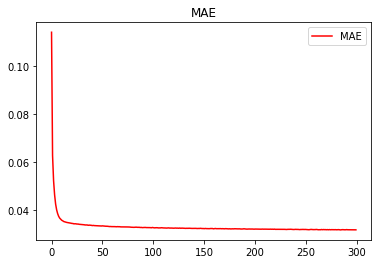

<Figure size 432x288 with 0 Axes>

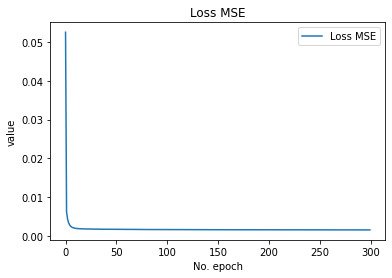

In [ ]:
mae = history_model.history['mae']
loss = history_model.history['loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='MAE')
plt.title('MAE')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(history_model.history['loss'], label='Loss MSE')
plt.title('Loss MSE')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc=0)
plt.show()

Testing a model with testing data

In [ ]:
predictions = model_n.predict(x_test)

Visualize testing prediction and compare the result between true label and prediction label

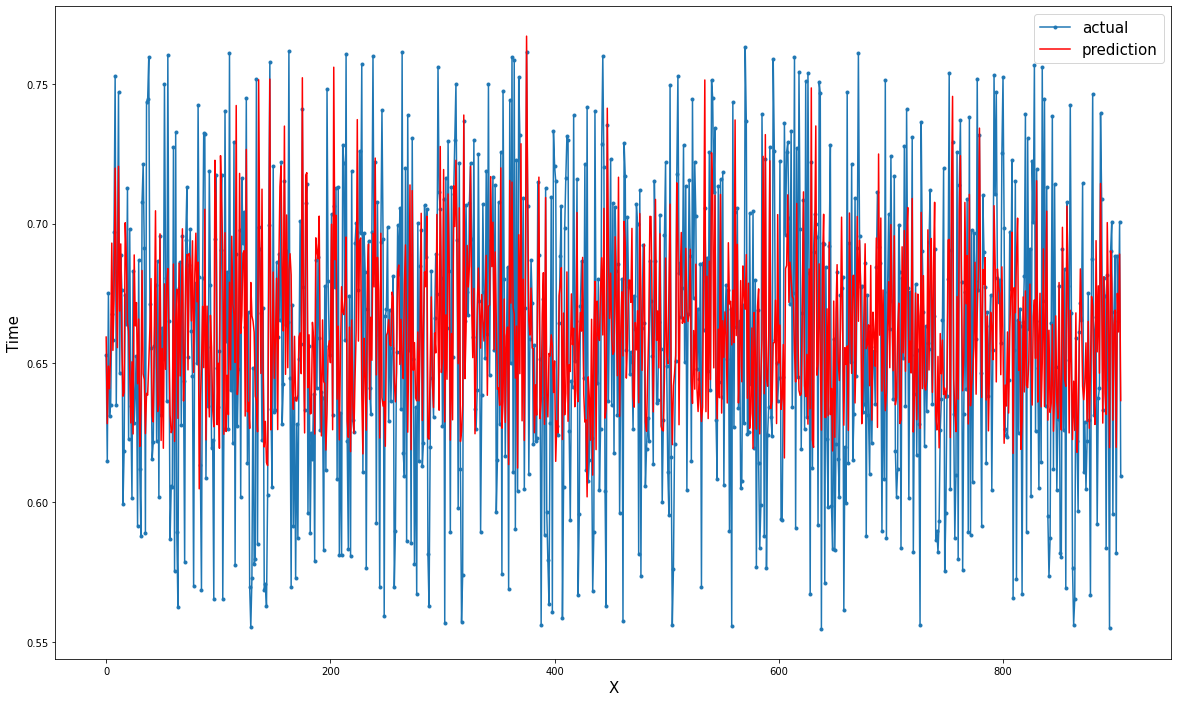

In [ ]:
aa=[x for x in range(len(y_test))]
plt.figure(figsize=(20, 12))
plt.plot(aa, y_test, marker='.', label="actual")
plt.plot(aa, predictions, 'r', label="prediction")
plt.ylabel('Time', size=15)
plt.xlabel('X', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
predictions

In [ ]:
y_test.shape, predictions.shape

((906, 1), (906, 1))

Make a submisson file and save to csv

In [ ]:
submission = pd.DataFrame({'Trip Duration': [y_test], 'Predict Trip Duration': [predictions]})
submission.to_csv('submission_ggu_4_22.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


Saving model

In [ ]:
model_n.save('GGU4-22.h5')